# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import mglearn 

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense 

from sklearn.preprocessing import MinMaxScaler

# Importing the dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


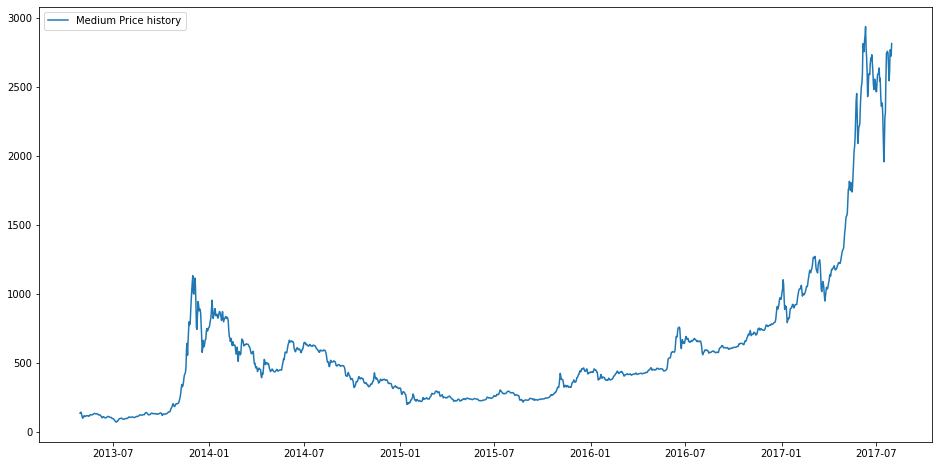

In [4]:
df.index=df.Date
df['MediumPrice']=(df.Open+df.High+df.Low+df.Close)/4
df.head()

plt.figure(figsize=(16,8))
plt.plot(df["MediumPrice"],label="Medium Price history")
plt.legend(loc='best')
plt.show()

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,MediumPrice
Date,,,,,,,,
2017-07-31,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2812.2025
2017-07-30,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2721.2375
2017-07-29,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2758.7575
2017-07-28,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2766.4800
2017-07-27,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2608.2875


# Sort the dataset on date time and filter "Date" and "MarketPrice" columns:

In [6]:
data=df.sort_index(ascending=True,axis=0)

new_dataset=pd.DataFrame(index=range(0,len(data)),columns=['Date','MediumPrice'])
for i in range(0,len(data)):
    new_dataset['Date'][i]=data['Date'][i]
    new_dataset['MediumPrice'][i]=data['MediumPrice'][i]

new_dataset.head()

,Date,MediumPrice
0,2013-04-28 00:00:00,134.398
1,2013-04-29 00:00:00,140.118
2,2013-04-30 00:00:00,140.995
3,2013-05-01 00:00:00,125.9
4,2013-05-02 00:00:00,109.867


# Normalize the new filtered dataset

In [7]:
final_dataset=new_dataset.values
train_data=final_dataset[:1245,:]
valid_data=final_dataset[1245:,:]

new_dataset.index=new_dataset.Date 
new_dataset.drop('Date',axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

# Build and train the LSTM model

In [8]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')

lstm_model.fit(x_train_data,y_train_data,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
1185/1185 - 26s - loss: 5.4672e-04
Epoch 2/10
1185/1185 - 27s - loss: 2.0908e-04
Epoch 3/10
1185/1185 - 26s - loss: 1.6293e-04
Epoch 4/10
1185/1185 - 26s - loss: 1.3809e-04
Epoch 5/10
1185/1185 - 26s - loss: 1.1562e-04
Epoch 6/10
1185/1185 - 26s - loss: 8.9504e-05
Epoch 7/10
1185/1185 - 26s - loss: 6.3057e-05
Epoch 8/10
1185/1185 - 25s - loss: 6.6774e-05
Epoch 9/10
1185/1185 - 26s - loss: 6.3380e-05
Epoch 10/10
1185/1185 - 26s - loss: 6.3945e-05


In [9]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values 
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

# Take a sample of a dataset to make stock price predictions using the LSTM model:

In [10]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

# Save the LSTM model:

In [11]:
lstm_model.save("saved_model.h5")

# Visualize the predited stock costs with actual stock costs:

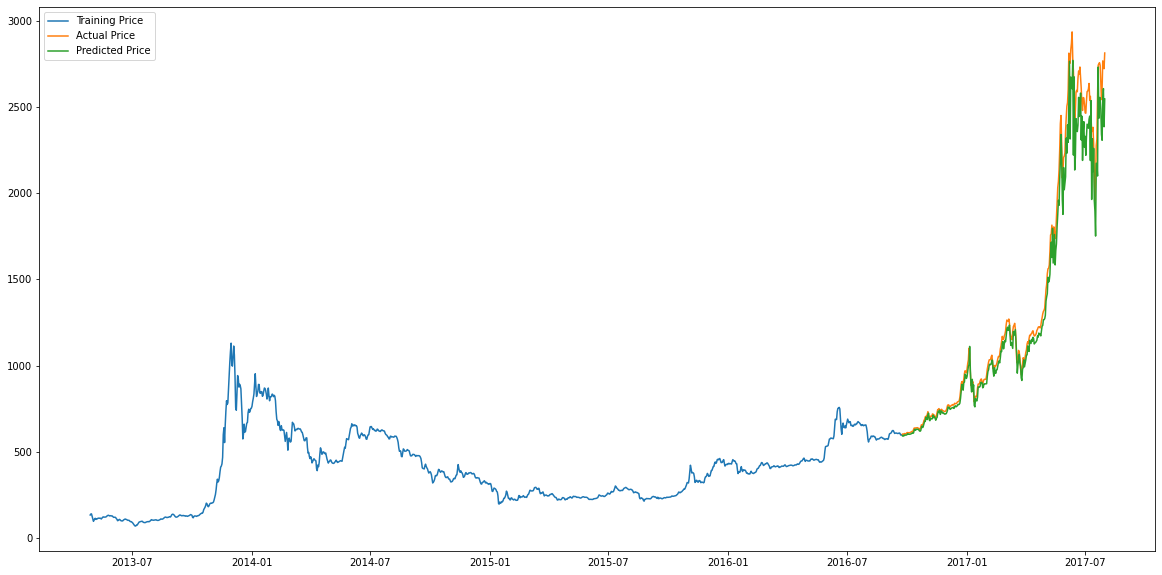

In [12]:
train_data=new_dataset[:1245]
valid_data=new_dataset[1245:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data['MediumPrice'],label='Training Price')
plt.plot(valid_data['MediumPrice'],label='Actual Price')
plt.plot(valid_data['Predictions'],label='Predicted Price')
plt.legend(loc='best')
plt.show()